In [41]:
import pandas as pd
import matplotlib.pyplot as plt

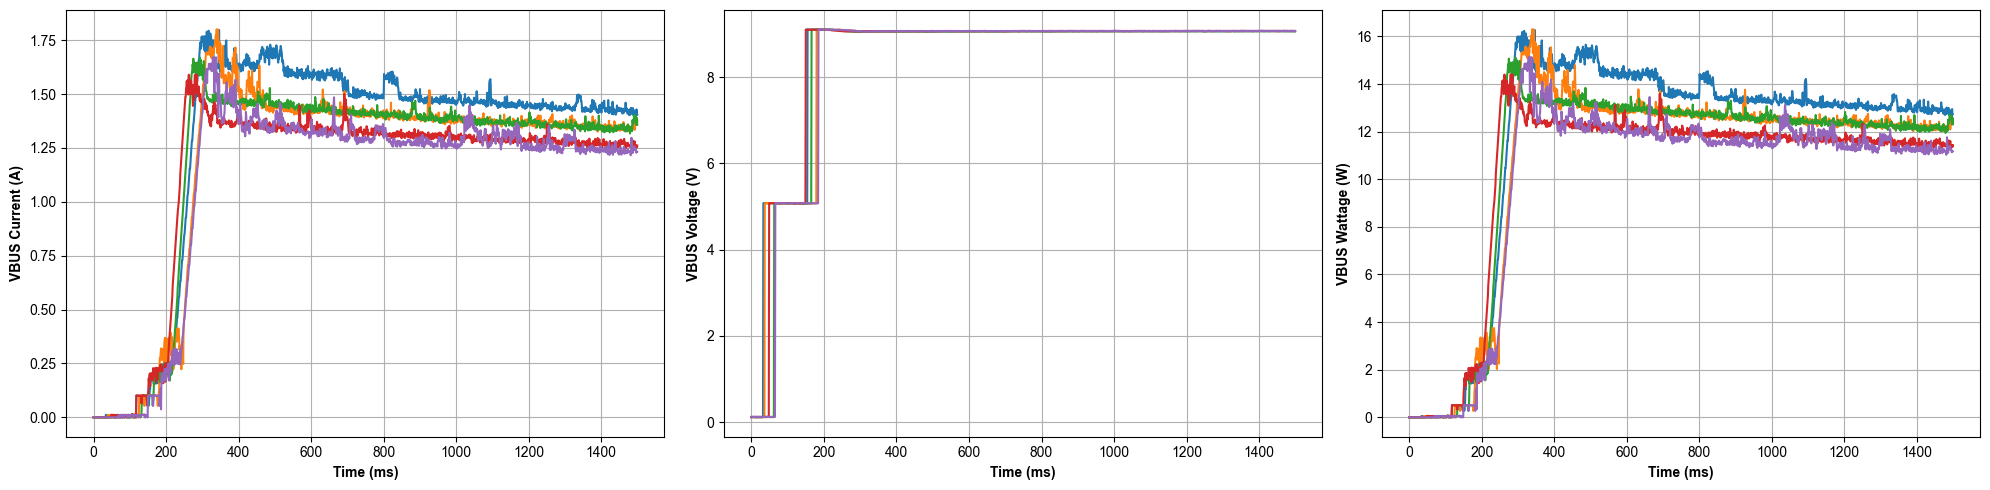

In [59]:
file_paths = [
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_1.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_2.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_3.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_4.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_6.csv'
]

columns = ['VBUS Current[A]', 'VBUS Voltage[V]', 'VBUS Wattage[W]']

def load_column_data(file_paths, columns):
  data = {}
  for col in columns:
    data[col] = []

  for path in file_paths:
    df = pd.read_csv(path)
    for col in columns:
      data[col].append(df[col])

  return data

pixel3a_15s_soc50_home_data = load_column_data(file_paths, columns)

pixel3a_15s_soc50_home_current = pixel3a_15s_soc50_home_data['VBUS Current[A]']
pixel3a_15s_soc50_home_voltage = pixel3a_15s_soc50_home_data['VBUS Voltage[V]']
pixel3a_15s_soc50_home_wattage = pixel3a_15s_soc50_home_data['VBUS Wattage[W]']

plot_data = [
    (pixel3a_15s_soc50_home_current, 'VBUS Current (A)'),
    (pixel3a_15s_soc50_home_voltage, 'VBUS Voltage (V)'),
    (pixel3a_15s_soc50_home_wattage, 'VBUS Wattage (W)')
]

plt.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i in range(len(plot_data)):
  data, ylabel = plot_data[i]
  for d in data:
    axs[i].plot(d, label='Google Pixel 3a')
  axs[i].set_xlabel('Time (ms)', fontweight='bold')
  axs[i].set_ylabel(ylabel, fontweight='bold')

  # legend = axs[i].legend()
  # for text in legend.get_texts():
  #   text.set_fontweight('bold')

  axs[i].grid(True)

plt.tight_layout()
plt.savefig('./images/GooglePixel3a/15s/vghub_15s_pixel3a_soc50_home_cvw.png')

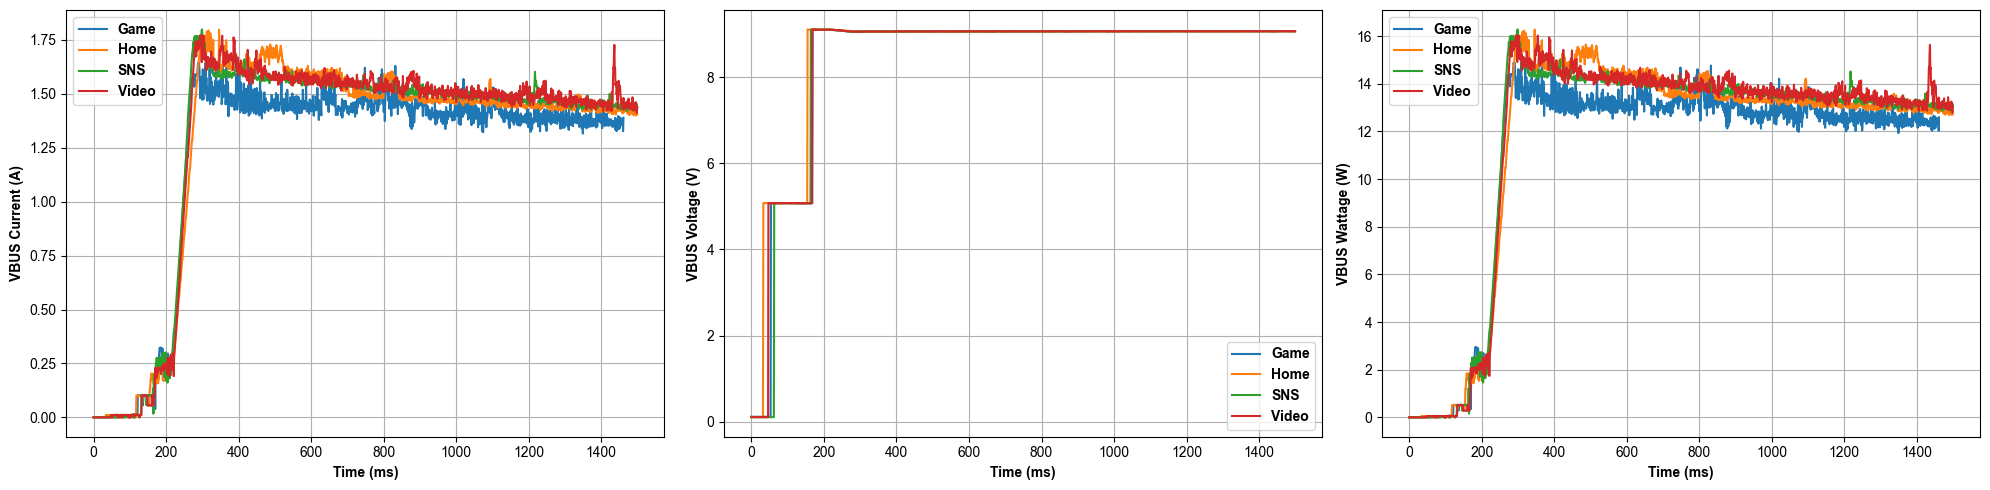

In [60]:
pixel3a_15s_soc50_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_1.csv')
pixel3a_15s_soc50_game = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_game_train_3.csv')
pixel3a_15s_soc50_sns = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_sns_train_1.csv')
pixel3a_15s_soc50_video = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_video_train_1.csv')

column_name = 'VBUS Current[A]'
pixel3a_15s_soc50_home_current = pixel3a_15s_soc50_home[column_name]
pixel3a_15s_soc50_game_current = pixel3a_15s_soc50_game[column_name]
pixel3a_15s_soc50_sns_current = pixel3a_15s_soc50_sns[column_name]
pixel3a_15s_soc50_video_current = pixel3a_15s_soc50_video[column_name]

column_name = 'VBUS Voltage[V]'
pixel3a_15s_soc50_home_voltage = pixel3a_15s_soc50_home[column_name]
pixel3a_15s_soc50_game_voltage = pixel3a_15s_soc50_game[column_name]
pixel3a_15s_soc50_sns_voltage = pixel3a_15s_soc50_sns[column_name]
pixel3a_15s_soc50_video_voltage = pixel3a_15s_soc50_video[column_name]

column_name = 'VBUS Wattage[W]'
pixel3a_15s_soc50_home_wattage = pixel3a_15s_soc50_home[column_name]
pixel3a_15s_soc50_game_wattage = pixel3a_15s_soc50_game[column_name]
pixel3a_15s_soc50_sns_wattage = pixel3a_15s_soc50_sns[column_name]
pixel3a_15s_soc50_video_wattage = pixel3a_15s_soc50_video[column_name]

plt.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].plot(pixel3a_15s_soc50_game_current, label='Game')
axs[0].plot(pixel3a_15s_soc50_home_current, label='Home')
axs[0].plot(pixel3a_15s_soc50_sns_current, label='SNS')
axs[0].plot(pixel3a_15s_soc50_video_current, label='Video')
axs[0].set_xlabel('Time (ms)', fontweight='bold')
axs[0].set_ylabel('VBUS Current (A)', fontweight='bold')
legend = axs[0].legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[0].grid(True)

axs[1].plot(pixel3a_15s_soc50_game_voltage, label='Game')
axs[1].plot(pixel3a_15s_soc50_home_voltage, label='Home')
axs[1].plot(pixel3a_15s_soc50_sns_voltage, label='SNS')
axs[1].plot(pixel3a_15s_soc50_video_voltage, label='Video')
axs[1].set_xlabel('Time (ms)', fontweight='bold')
axs[1].set_ylabel('VBUS Voltage (V)', fontweight='bold')
legend = axs[1].legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[1].grid(True)

axs[2].plot(pixel3a_15s_soc50_game_wattage, label='Game')
axs[2].plot(pixel3a_15s_soc50_home_wattage, label='Home')
axs[2].plot(pixel3a_15s_soc50_sns_wattage, label='SNS')
axs[2].plot(pixel3a_15s_soc50_video_wattage, label='Video')
axs[2].set_xlabel('Time (ms)', fontweight='bold')
axs[2].set_ylabel('VBUS Wattage (W)', fontweight='bold')
legend = axs[2].legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[2].grid(True)

plt.tight_layout()
plt.savefig('./images/googlepixel3a/15s/vghub_15s_pixel3a_soc50_app_cvw.png')
plt.show()

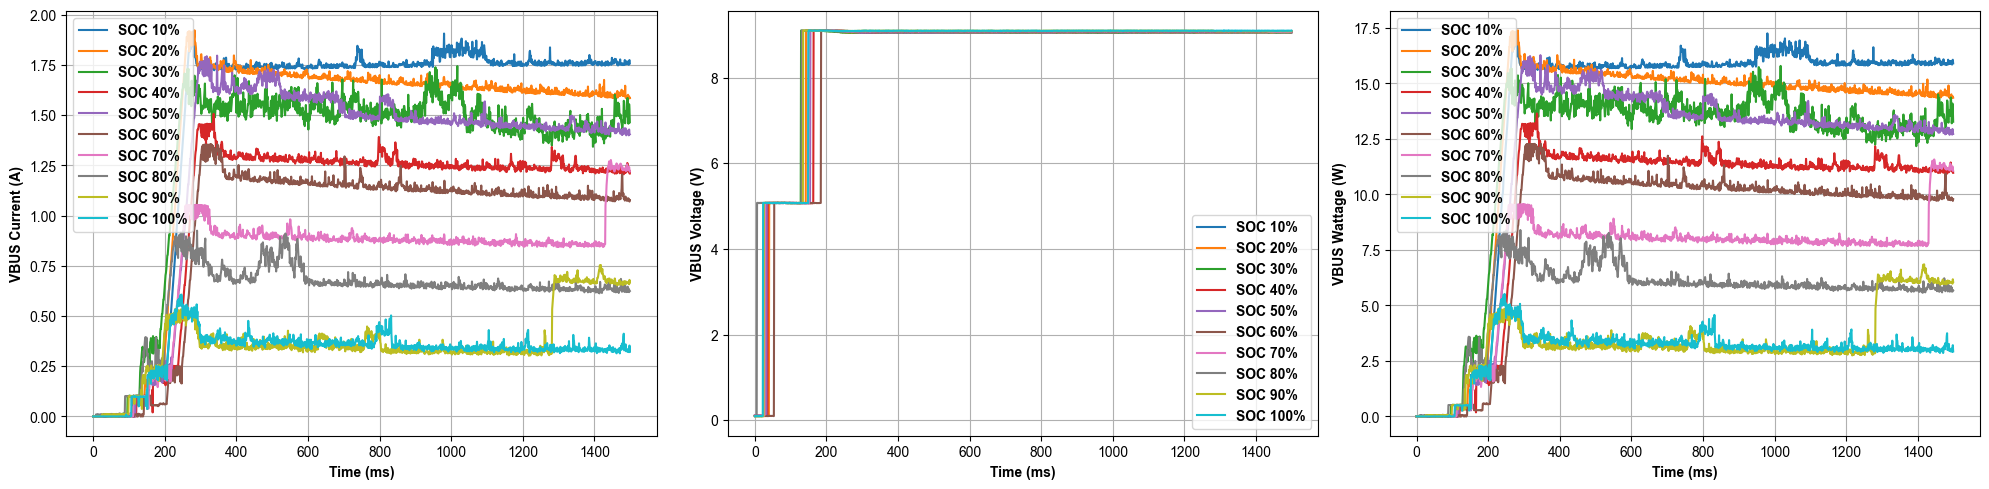

In [61]:
pixel3a_15s_soc10_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc10_home_train_1.csv')
pixel3a_15s_soc20_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc20_home_train_1.csv')
pixel3a_15s_soc30_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc30_home_train_1.csv')
pixel3a_15s_soc40_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc40_home_train_1.csv')
pixel3a_15s_soc50_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_1.csv')
pixel3a_15s_soc60_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc60_home_train_1.csv')
pixel3a_15s_soc70_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc70_home_train_1.csv')
pixel3a_15s_soc80_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc80_home_train_1.csv')
pixel3a_15s_soc90_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc90_home_train_1.csv')
pixel3a_15s_soc100_home = pd.read_csv( '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc100_home_train_1.csv')

column_name = 'VBUS Current[A]'
pixel3a_15s_soc10_home_current = pixel3a_15s_soc10_home[column_name]
pixel3a_15s_soc20_home_current = pixel3a_15s_soc20_home[column_name]
pixel3a_15s_soc30_home_current = pixel3a_15s_soc30_home[column_name]
pixel3a_15s_soc40_home_current = pixel3a_15s_soc40_home[column_name]
pixel3a_15s_soc50_home_current = pixel3a_15s_soc50_home[column_name]
pixel3a_15s_soc60_home_current = pixel3a_15s_soc60_home[column_name]
pixel3a_15s_soc70_home_current = pixel3a_15s_soc70_home[column_name]
pixel3a_15s_soc80_home_current = pixel3a_15s_soc80_home[column_name]
pixel3a_15s_soc90_home_current = pixel3a_15s_soc90_home[column_name]
pixel3a_15s_soc100_home_current = pixel3a_15s_soc100_home[column_name]

column_name = 'VBUS Voltage[V]'
pixel3a_15s_soc10_home_voltage = pixel3a_15s_soc10_home[column_name]
pixel3a_15s_soc20_home_voltage = pixel3a_15s_soc20_home[column_name]
pixel3a_15s_soc30_home_voltage = pixel3a_15s_soc30_home[column_name]
pixel3a_15s_soc40_home_voltage = pixel3a_15s_soc40_home[column_name]
pixel3a_15s_soc50_home_voltage = pixel3a_15s_soc50_home[column_name]
pixel3a_15s_soc60_home_voltage = pixel3a_15s_soc60_home[column_name]
pixel3a_15s_soc70_home_voltage = pixel3a_15s_soc70_home[column_name]
pixel3a_15s_soc80_home_voltage = pixel3a_15s_soc80_home[column_name]
pixel3a_15s_soc90_home_voltage = pixel3a_15s_soc90_home[column_name]
pixel3a_15s_soc100_home_voltage = pixel3a_15s_soc100_home[column_name]

column_name = 'VBUS Wattage[W]'
pixel3a_15s_soc10_home_wattage = pixel3a_15s_soc10_home[column_name]
pixel3a_15s_soc20_home_wattage = pixel3a_15s_soc20_home[column_name]
pixel3a_15s_soc30_home_wattage = pixel3a_15s_soc30_home[column_name]
pixel3a_15s_soc40_home_wattage = pixel3a_15s_soc40_home[column_name]
pixel3a_15s_soc50_home_wattage = pixel3a_15s_soc50_home[column_name]
pixel3a_15s_soc60_home_wattage = pixel3a_15s_soc60_home[column_name]
pixel3a_15s_soc70_home_wattage = pixel3a_15s_soc70_home[column_name]
pixel3a_15s_soc80_home_wattage = pixel3a_15s_soc80_home[column_name]
pixel3a_15s_soc90_home_wattage = pixel3a_15s_soc90_home[column_name]
pixel3a_15s_soc100_home_wattage = pixel3a_15s_soc100_home[column_name]

plt.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].plot(pixel3a_15s_soc10_home_current, label='SOC 10%')
axs[0].plot(pixel3a_15s_soc20_home_current, label='SOC 20%')
axs[0].plot(pixel3a_15s_soc30_home_current, label='SOC 30%')
axs[0].plot(pixel3a_15s_soc40_home_current, label='SOC 40%')
axs[0].plot(pixel3a_15s_soc50_home_current, label='SOC 50%')
axs[0].plot(pixel3a_15s_soc60_home_current, label='SOC 60%')
axs[0].plot(pixel3a_15s_soc70_home_current, label='SOC 70%')
axs[0].plot(pixel3a_15s_soc80_home_current, label='SOC 80%')
axs[0].plot(pixel3a_15s_soc90_home_current, label='SOC 90%')
axs[0].plot(pixel3a_15s_soc100_home_current, label='SOC 100%')
axs[0].set_xlabel('Time (ms)', fontweight='bold')
axs[0].set_ylabel('VBUS Current (A)', fontweight='bold')
legend = axs[0].legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[0].grid(True)

axs[1].plot(pixel3a_15s_soc10_home_voltage, label='SOC 10%')
axs[1].plot(pixel3a_15s_soc20_home_voltage, label='SOC 20%')
axs[1].plot(pixel3a_15s_soc30_home_voltage, label='SOC 30%')
axs[1].plot(pixel3a_15s_soc40_home_voltage, label='SOC 40%')
axs[1].plot(pixel3a_15s_soc50_home_voltage, label='SOC 50%')
axs[1].plot(pixel3a_15s_soc60_home_voltage, label='SOC 60%')
axs[1].plot(pixel3a_15s_soc70_home_voltage, label='SOC 70%')
axs[1].plot(pixel3a_15s_soc80_home_voltage, label='SOC 80%')
axs[1].plot(pixel3a_15s_soc90_home_voltage, label='SOC 90%')
axs[1].plot(pixel3a_15s_soc100_home_voltage, label='SOC 100%')
axs[1].set_xlabel('Time (ms)', fontweight='bold')
axs[1].set_ylabel('VBUS Voltage (V)', fontweight='bold')
legend = axs[1].legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[1].grid(True)

axs[2].plot(pixel3a_15s_soc10_home_wattage, label='SOC 10%')
axs[2].plot(pixel3a_15s_soc20_home_wattage, label='SOC 20%')
axs[2].plot(pixel3a_15s_soc30_home_wattage, label='SOC 30%')
axs[2].plot(pixel3a_15s_soc40_home_wattage, label='SOC 40%')
axs[2].plot(pixel3a_15s_soc50_home_wattage, label='SOC 50%')
axs[2].plot(pixel3a_15s_soc60_home_wattage, label='SOC 60%')
axs[2].plot(pixel3a_15s_soc70_home_wattage, label='SOC 70%')
axs[2].plot(pixel3a_15s_soc80_home_wattage, label='SOC 80%')
axs[2].plot(pixel3a_15s_soc90_home_wattage, label='SOC 90%')
axs[2].plot(pixel3a_15s_soc100_home_wattage, label='SOC 100%')
axs[2].set_xlabel('Time (ms)', fontweight='bold')
axs[2].set_ylabel('VBUS Wattage (W)', fontweight='bold')
legend = axs[2].legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[2].grid(True)

plt.tight_layout()
plt.savefig('./images/googlepixel3a/15s/vghub_15s_pixel3a_soc_home_cvw.png')
plt.show()